# <center>Customer Disengagement Forecaster

In [1]:
# Import libraries and data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('Telco-Customer-Churn.csv')

---

## Exploratory Data Analysis

In [2]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [4]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [5]:
# Check NaN values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

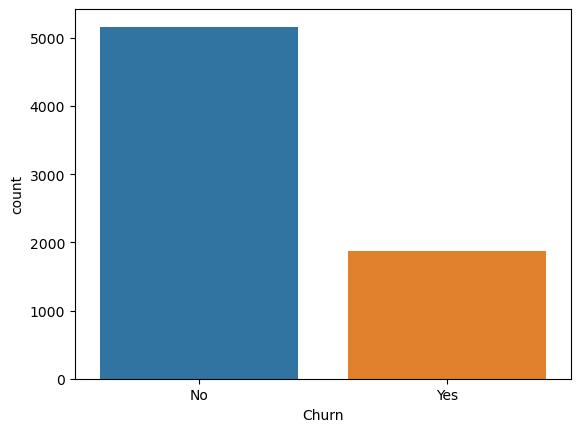

In [6]:
# Check balance of data classes
sns.countplot(data=df, x='Churn');

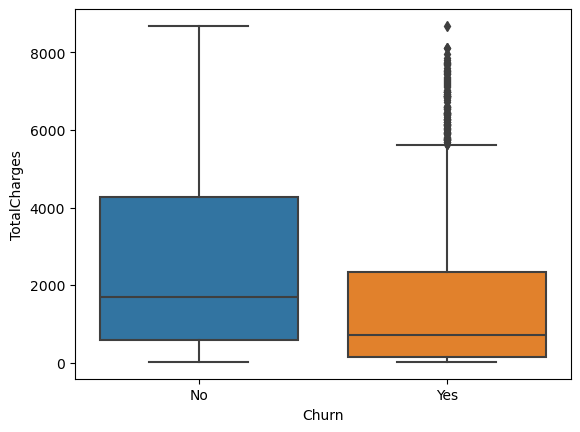

In [7]:
# Check distribution of churn categories using box plot
sns.boxplot(data=df, x='Churn',y='TotalCharges');

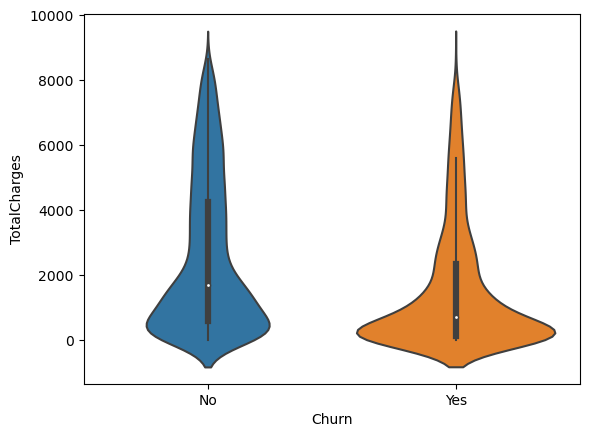

In [8]:
# Check distribution of churn categories using violin plot
sns.violinplot(data=df, x='Churn',y='TotalCharges');

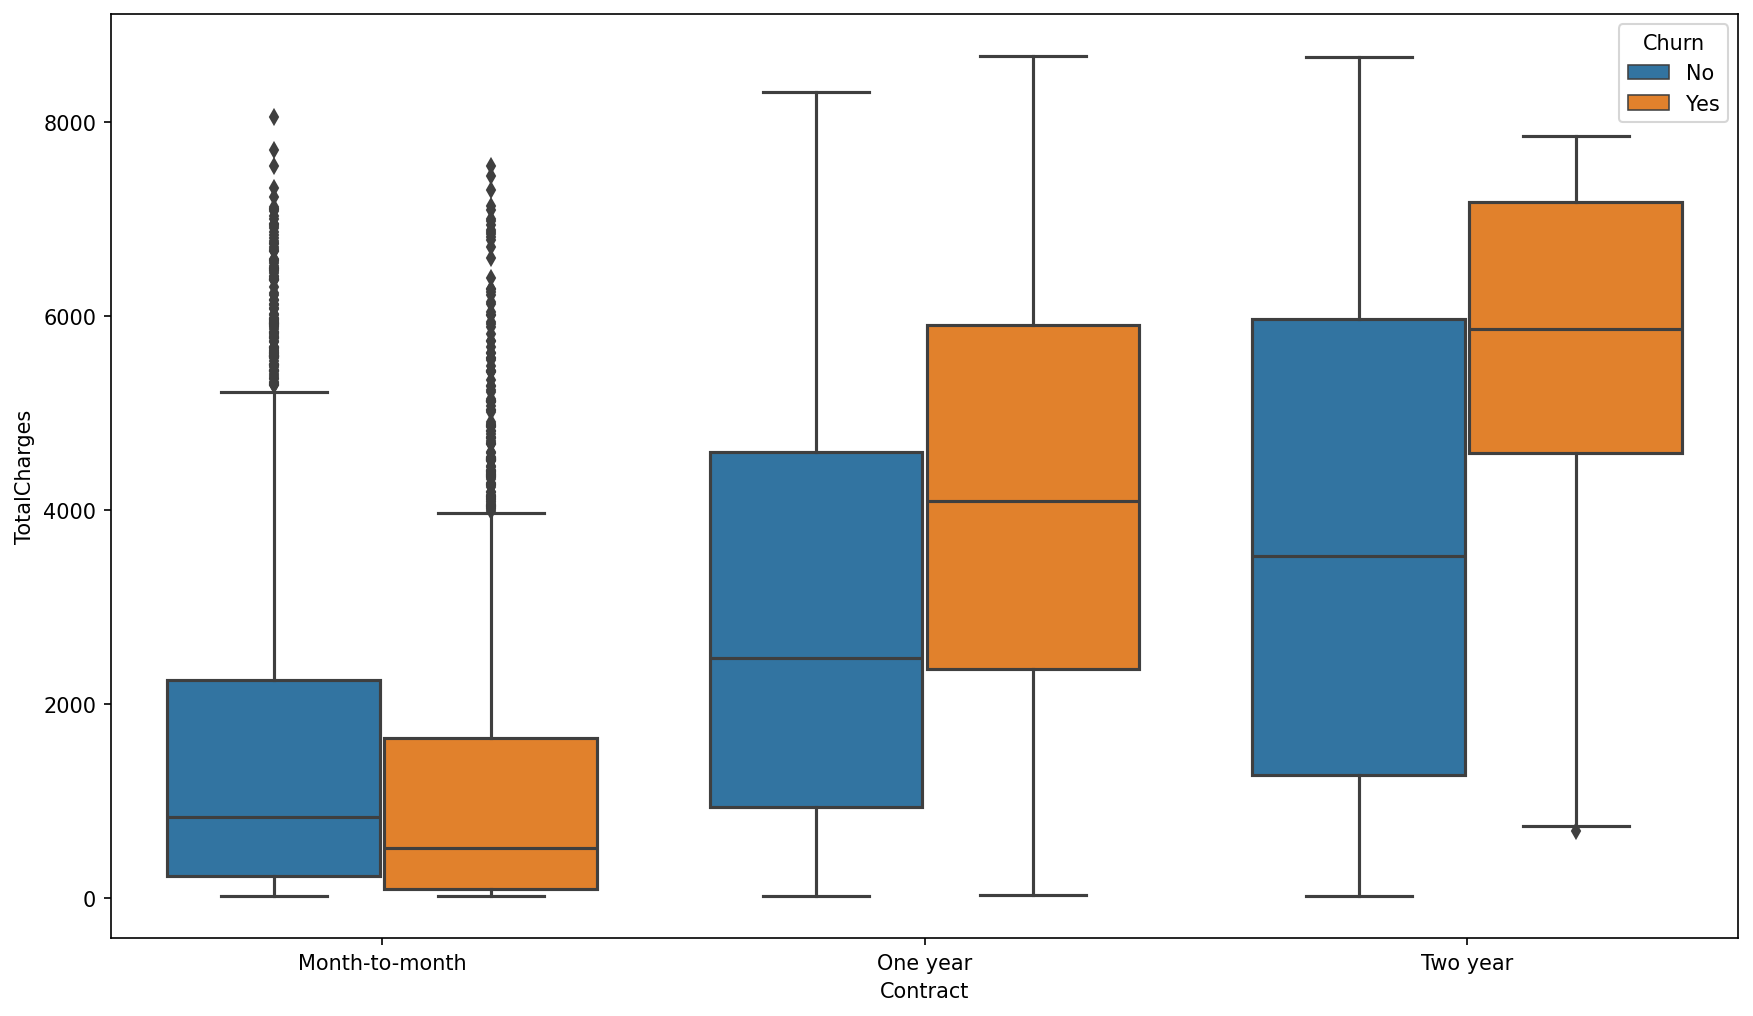

In [9]:
# Check the distribution of TotalCharges per Contract type based on the Churn class
plt.figure(figsize=(14,8), dpi=150)
sns.boxplot(data=df, y='TotalCharges', x='Contract', hue='Churn');

In [10]:
# Check correlation of features to the class label
dummies = pd.get_dummies(df[['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'InternetService','StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']])
cycorr = dummies.corr()['Churn_Yes'].sort_values(ascending=True).iloc[1:-1]
cycorr

Contract_Two year                         -0.301552
DeviceProtection_No internet service      -0.227578
StreamingMovies_No internet service       -0.227578
StreamingTV_No internet service           -0.227578
InternetService_No                        -0.227578
TechSupport_No internet service           -0.227578
OnlineBackup_No internet service          -0.227578
OnlineSecurity_No internet service        -0.227578
PaperlessBilling_No                       -0.191454
Contract_One year                         -0.178225
OnlineSecurity_Yes                        -0.171270
TechSupport_Yes                           -0.164716
Dependents_Yes                            -0.163128
Partner_Yes                               -0.149982
PaymentMethod_Credit card (automatic)     -0.134687
InternetService_DSL                       -0.124141
PaymentMethod_Bank transfer (automatic)   -0.118136
PaymentMethod_Mailed check                -0.090773
OnlineBackup_Yes                          -0.082307
DeviceProtec

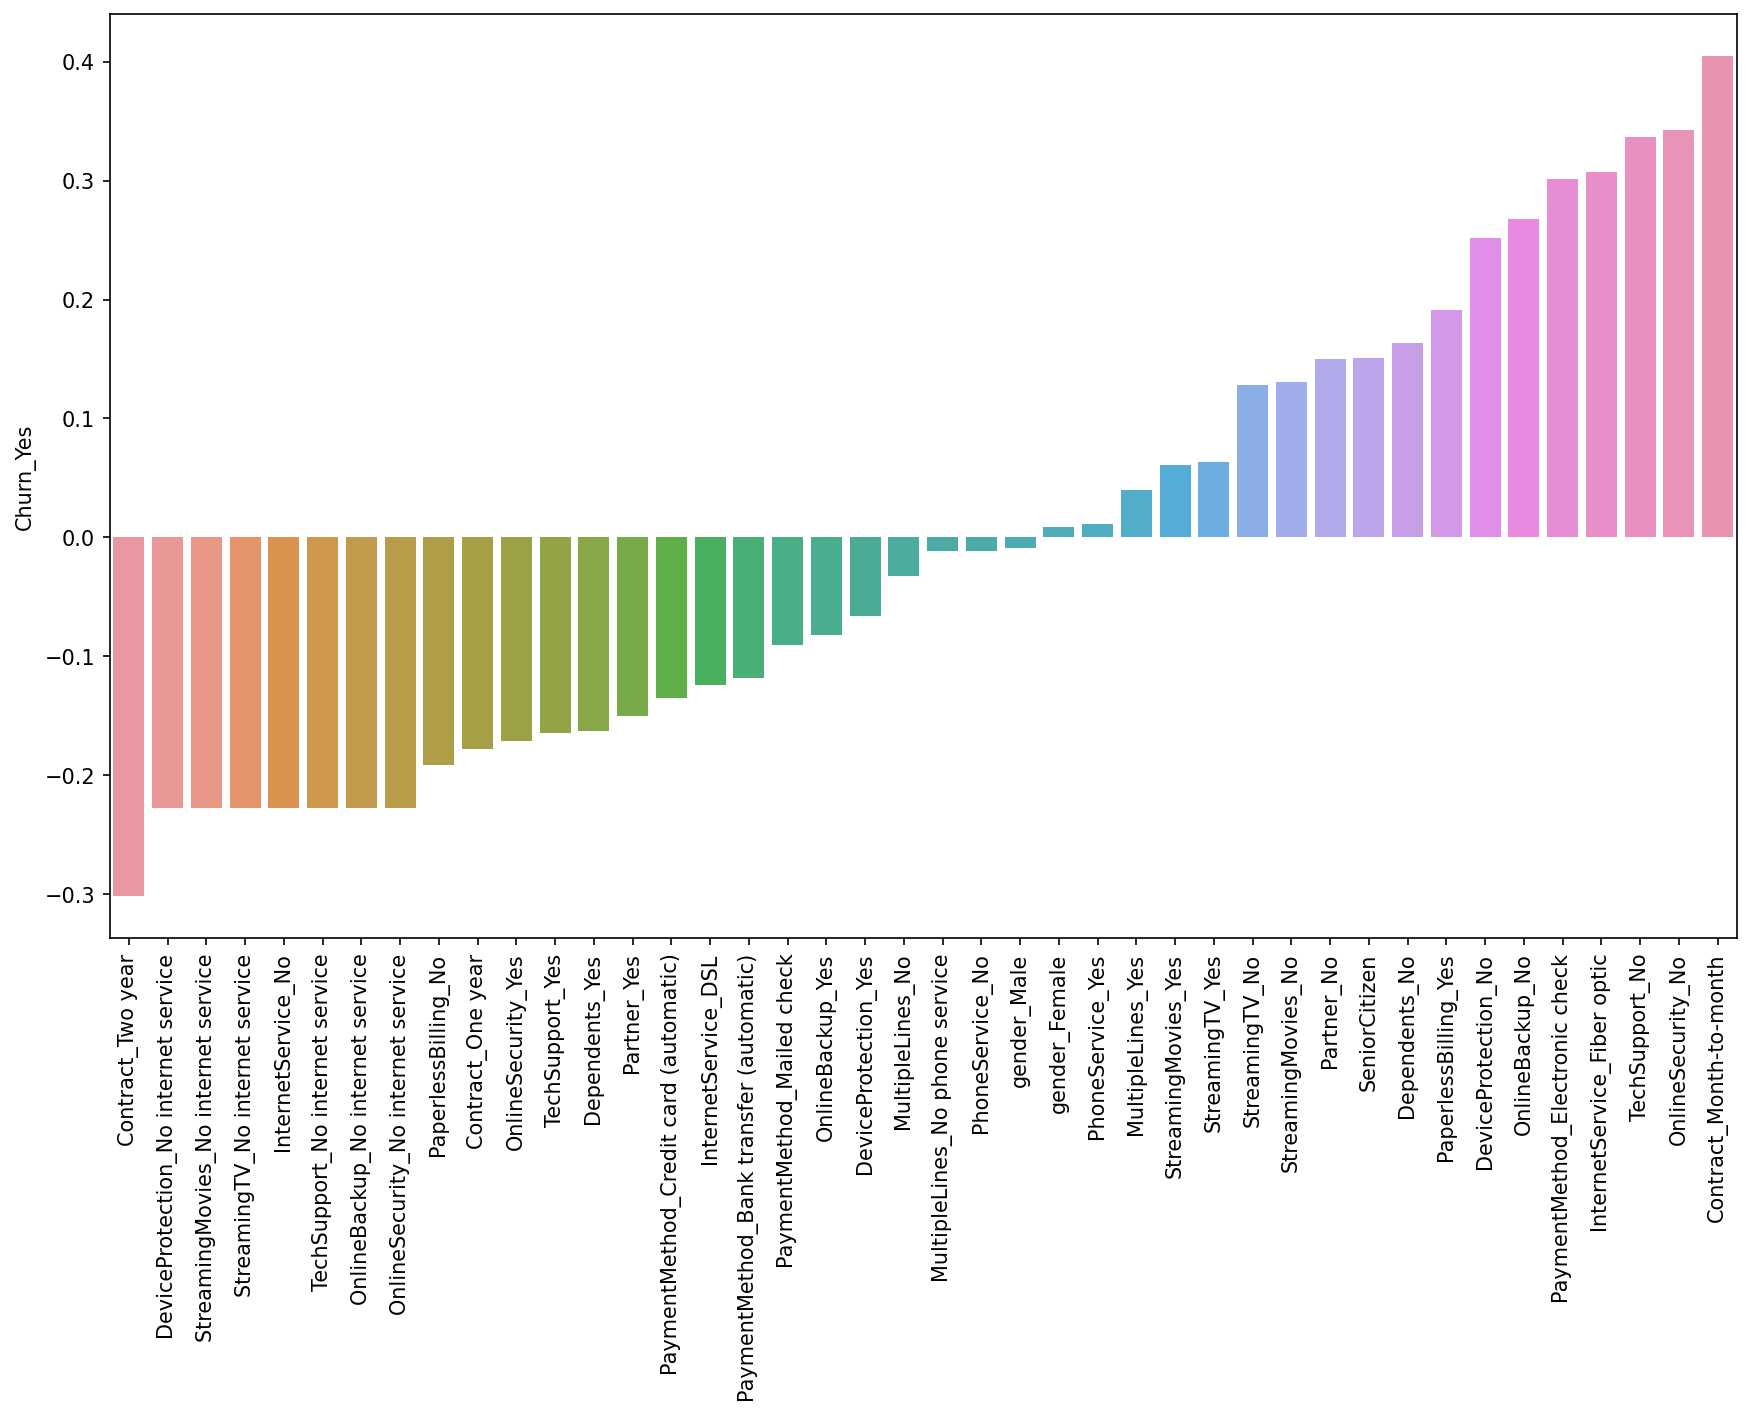

In [11]:
plt.figure(figsize=(14,8), dpi=150)
plt.xticks(rotation=90)
sns.barplot(x=cycorr.index,y=cycorr);

---

# Analysing Churn

In [12]:
# Check the contract types available
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

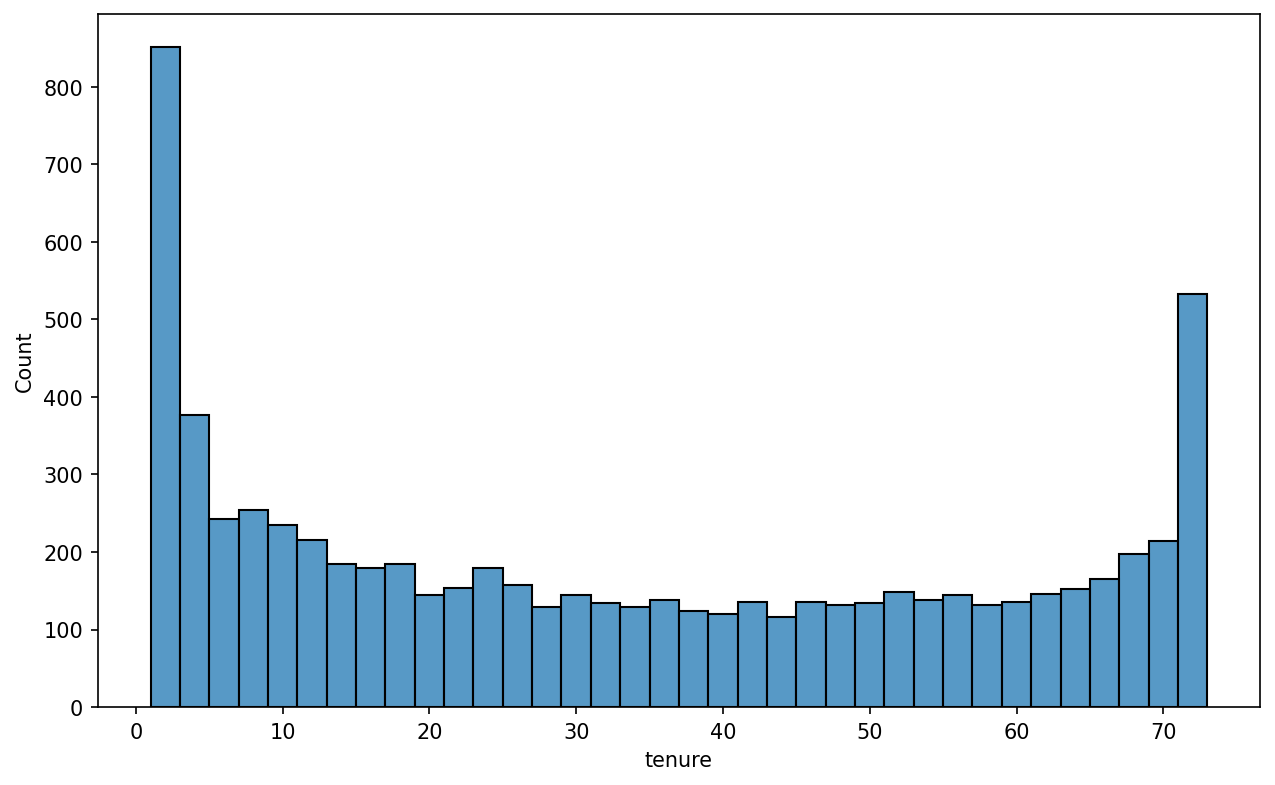

In [13]:
# Create a histogram displaying the distribution of 'tenure' column
plt.figure(figsize=(10,6), dpi=150)
sns.histplot(data=df, x='tenure', binwidth=2);

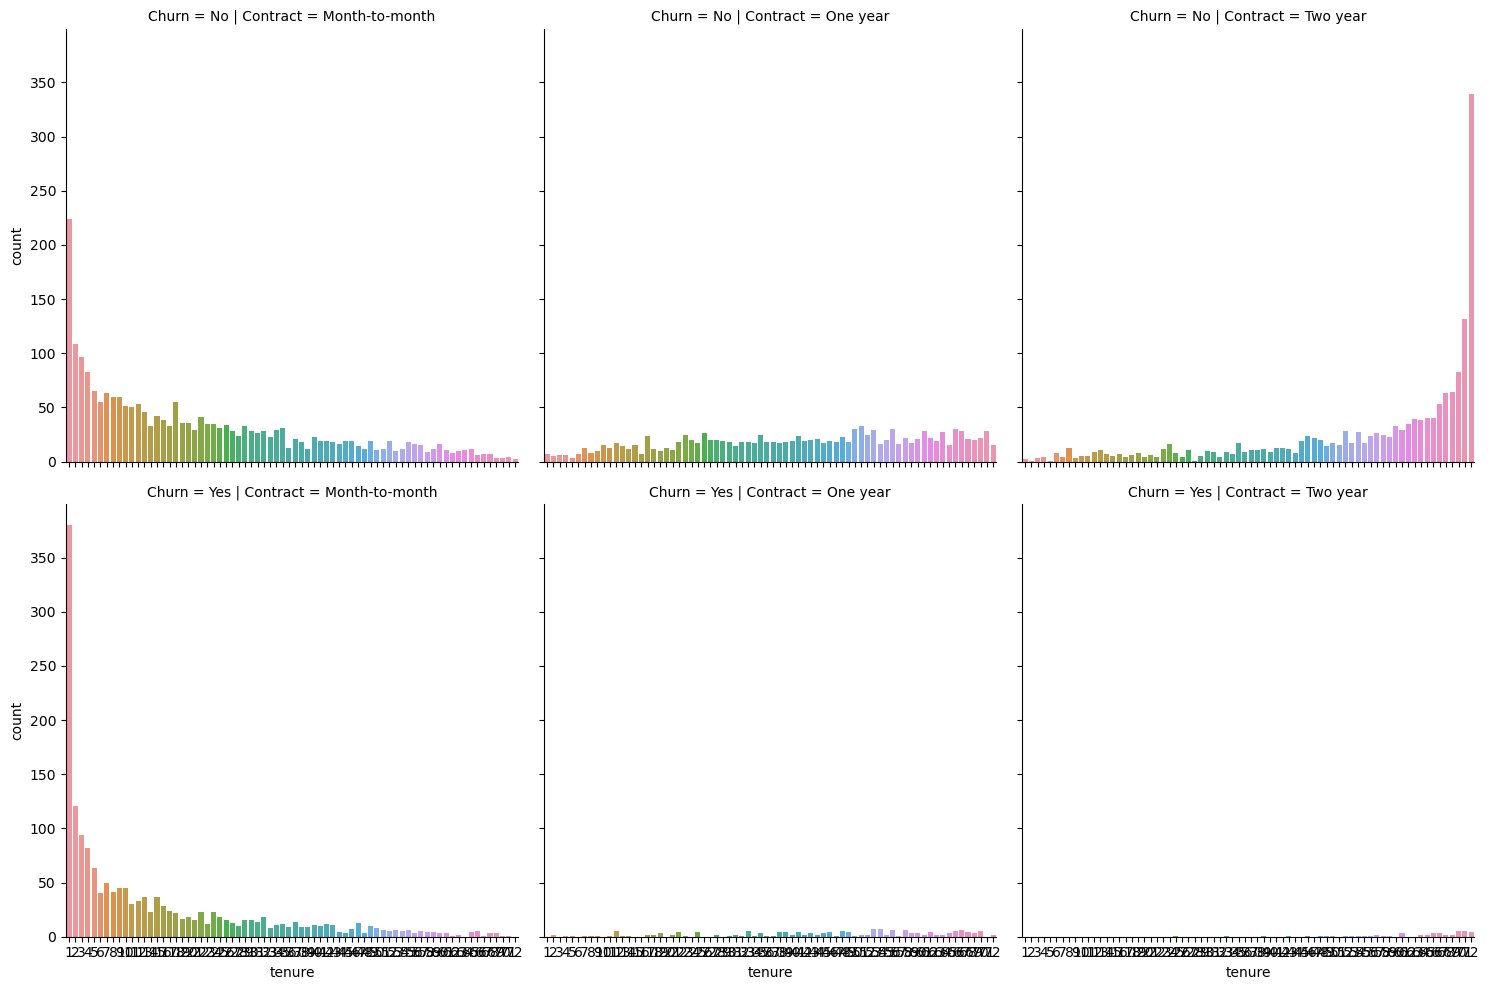

In [14]:
# Create histograms separated by features Churn and Contract
sns.catplot(data=df, x='tenure', kind='count',row='Churn',col='Contract');

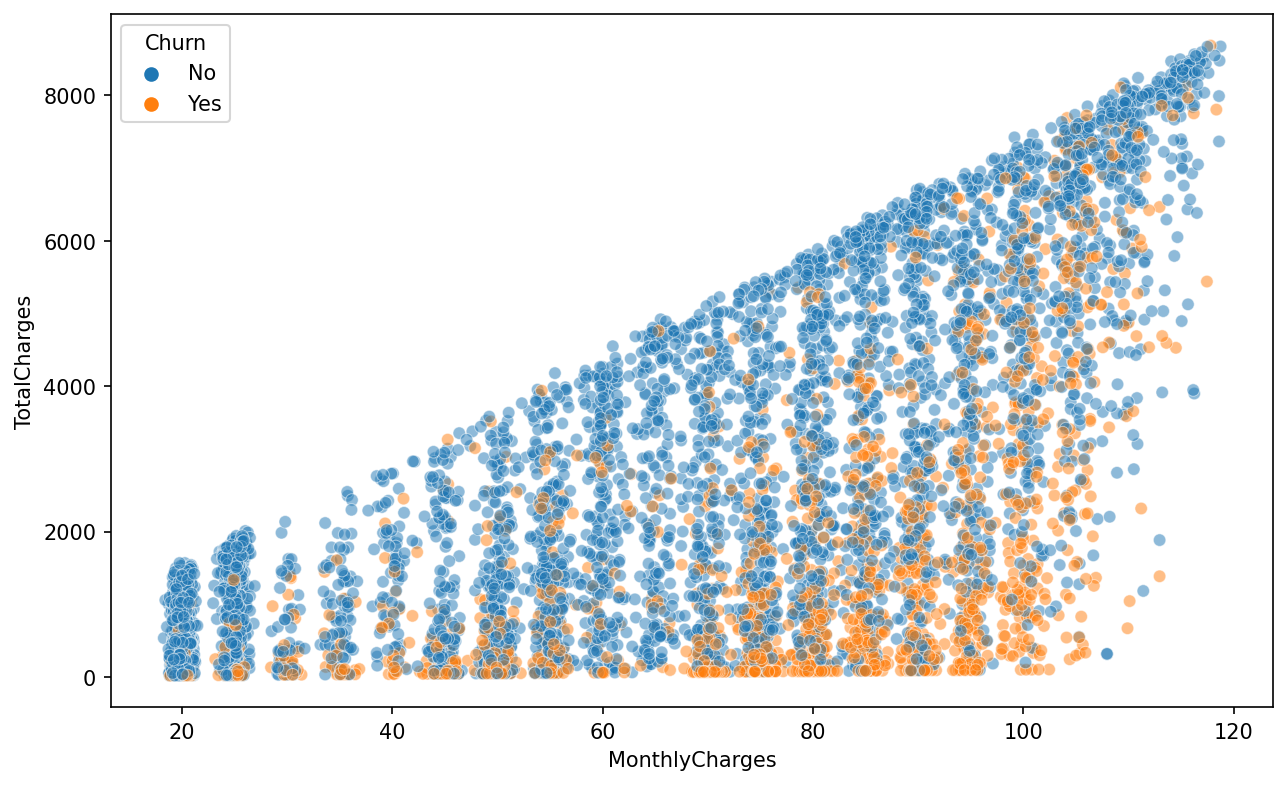

In [15]:
# Create scatter plot of Total Charges versus Monthly Charges
plt.figure(figsize=(10,6), dpi=150)
sns.scatterplot(data=df, y='TotalCharges', x='MonthlyCharges', hue='Churn', alpha=0.5);

In [16]:
# Calculate the Churn rate (percentage that had Yes Churn) per cohort
dict1 = {}
for i in range(1,73):
    dict1[i] = 0

def cohort(months):
    if months in dict1.keys():
        dict1[months] += 1
    return pd.Series(dict1.values())

ten_group = df[df['Churn']=='Yes']['tenure'].apply(cohort)
no_churn = df.groupby(['Churn','tenure']).count().transpose()['No']
yes_churn = df.groupby(['Churn','tenure']).count().transpose()['Yes']

churn_rate = 100 * yes_churn / (no_churn+yes_churn)
chun_ten = churn_rate.transpose()['customerID']

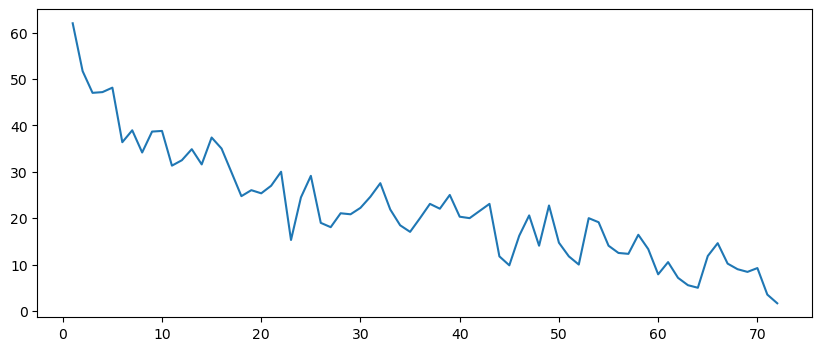

In [17]:
# Create a plot showing churn rate per months of tenure
plt.figure(figsize=(10,4), dpi=100)
plt.plot(chun_ten);

In [18]:
# Based on the tenure column values, create a new column called Tenure Cohort that creates 4 separate categories
def ten_group(months):
    if months < 13:
        return '0-12 Months'
    elif months < 25:
        return '12-24 Months'
    elif months < 49:
        return '24-48 Months'
    else:
        return "Over 48 Months"
    
df['Tenure Cohort'] = df['tenure'].apply(ten_group)
df[['tenure','Tenure Cohort']]

,tenure,Tenure Cohort
0,1,0-12 Months
1,34,24-48 Months
2,2,0-12 Months
3,45,24-48 Months
4,2,0-12 Months
...,...,...
7027,24,12-24 Months
7028,72,Over 48 Months
7029,11,0-12 Months
7030,4,0-12 Months


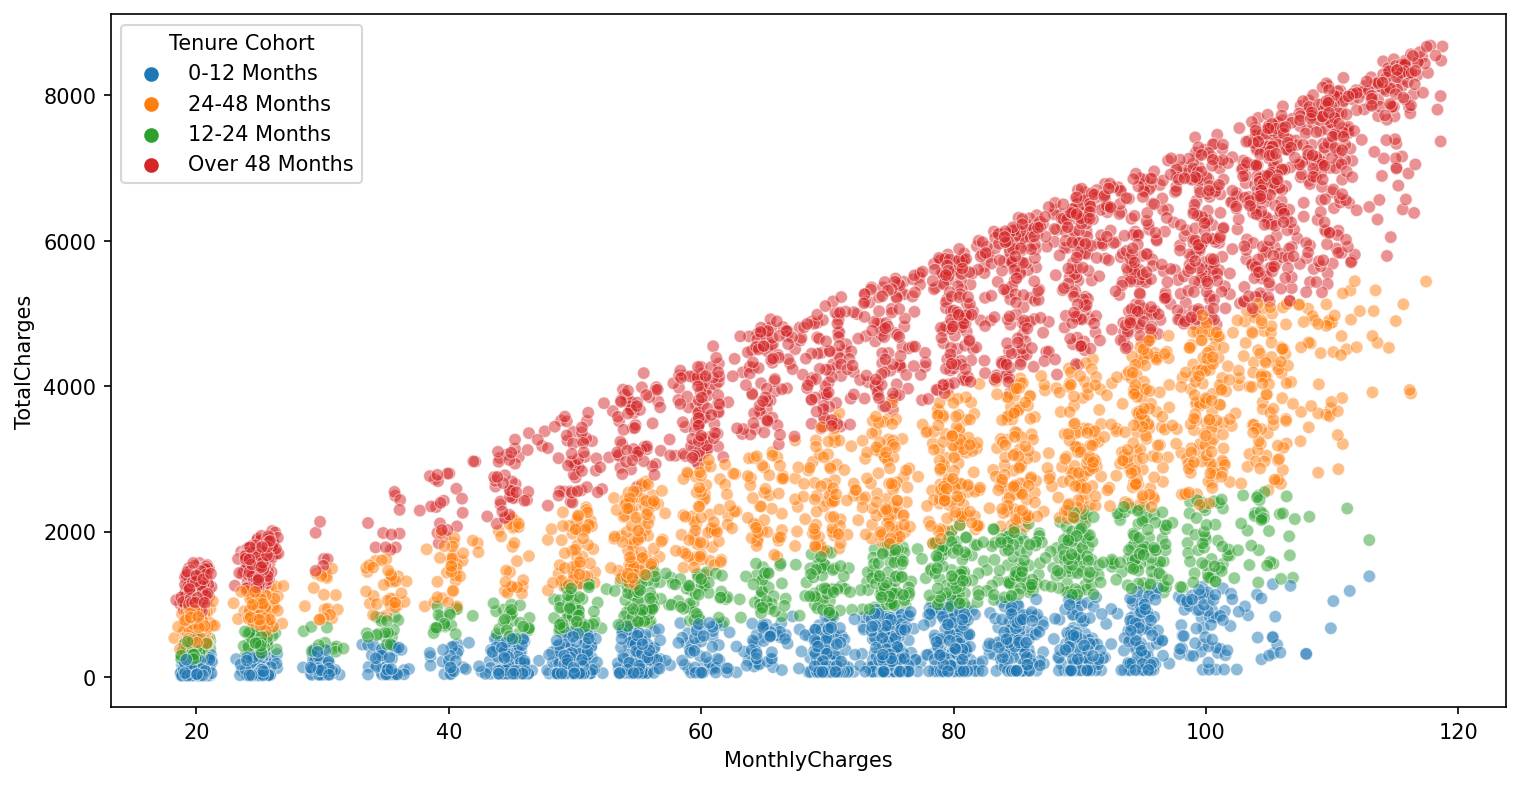

In [19]:
# Create a scatterplot of Total Charges versus Monthly Charts
plt.figure(figsize=(12,6), dpi=150)
sns.scatterplot(data=df, x='MonthlyCharges', y='TotalCharges', hue='Tenure Cohort', alpha=0.5);

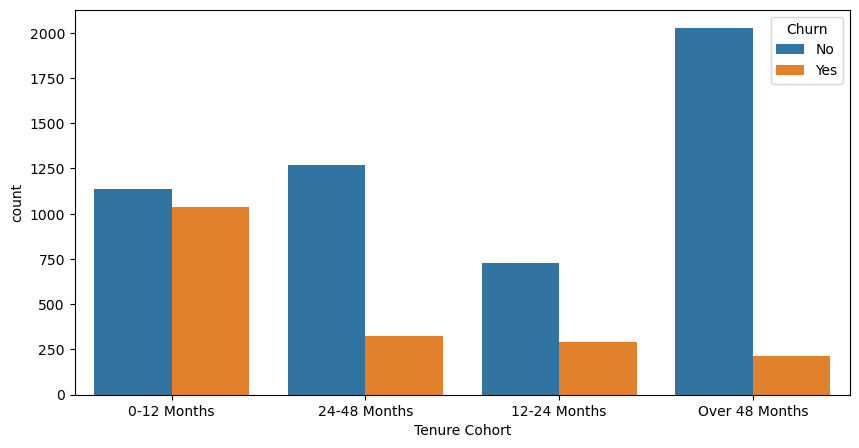

In [20]:
# Create a count plot showing the churn count per Cohort
plt.figure(figsize=(10,5), dpi=100)
sns.countplot(data=df, x='Tenure Cohort', hue='Churn');

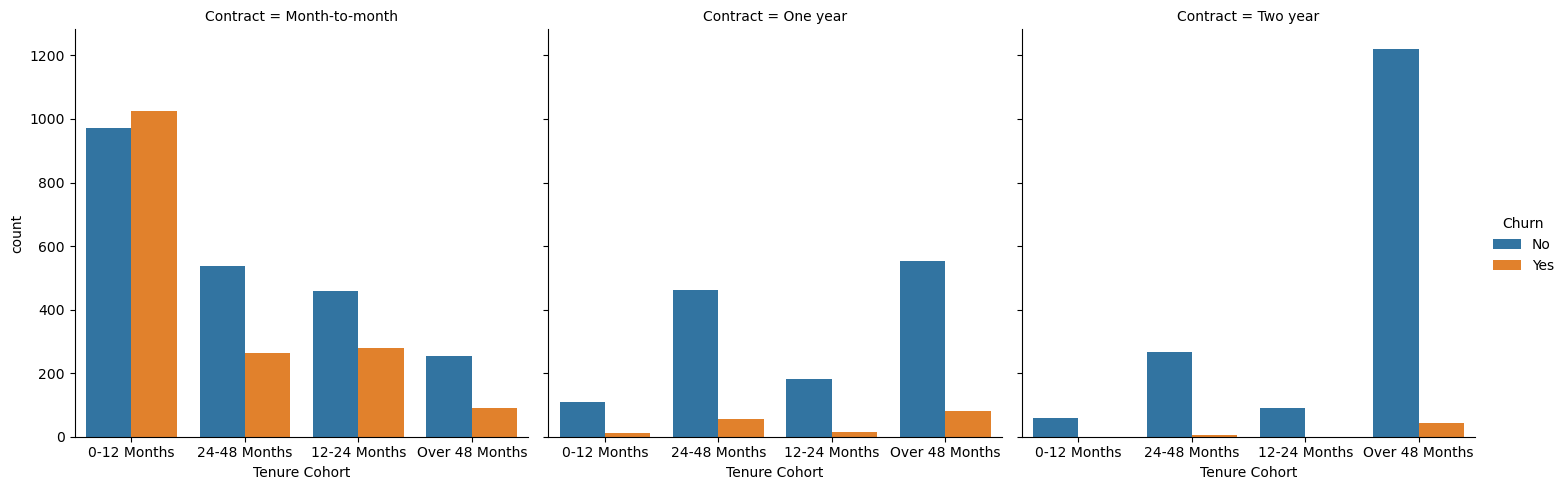

In [21]:
# Create a grid of Count Plots showing counts per Tenure Cohort
sns.catplot(data=df, x='Tenure Cohort', kind='count',hue='Churn',col='Contract');

-----

# Part 4: Predictive Modeling
<h4>Models employed: A Single Decision Tree, Random Forest, AdaBoost, Gradient Boosting.

---

## Single Decision Tree

In [22]:
# Separate the data into X features and Y label
X = df.drop('Churn', axis=1)
y = df['Churn']
X = pd.get_dummies(data=X, drop_first=True)

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
# Perform a train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=101)

In [25]:
# Train the model
from sklearn.tree import DecisionTreeClassifier
model1 = DecisionTreeClassifier()
model1.fit(X_train, y_train)

DecisionTreeClassifier()

In [26]:
# Make predictions on test set
preds = model1.predict(X_test)

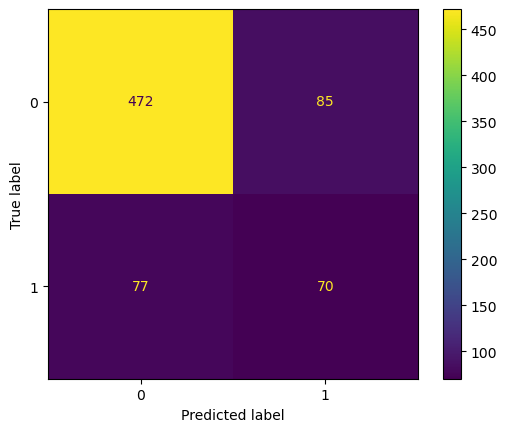

In [27]:
# Evaluate the model
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, preds)
disp = ConfusionMatrixDisplay(cm)
disp.plot();

In [28]:
accuracy_score(y_test, preds)

0.7698863636363636

In [29]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

          No       0.86      0.85      0.85       557
         Yes       0.45      0.48      0.46       147

    accuracy                           0.77       704
   macro avg       0.66      0.66      0.66       704
weighted avg       0.77      0.77      0.77       704



In [30]:
# Evaluate feature importance
imp_feats = pd.DataFrame(data=model1.feature_importances_, index=X.columns, columns=['Feature Importance']).sort_values('Feature Importance')
imp_feats = imp_feats.sort_values('Feature Importance').tail(20)

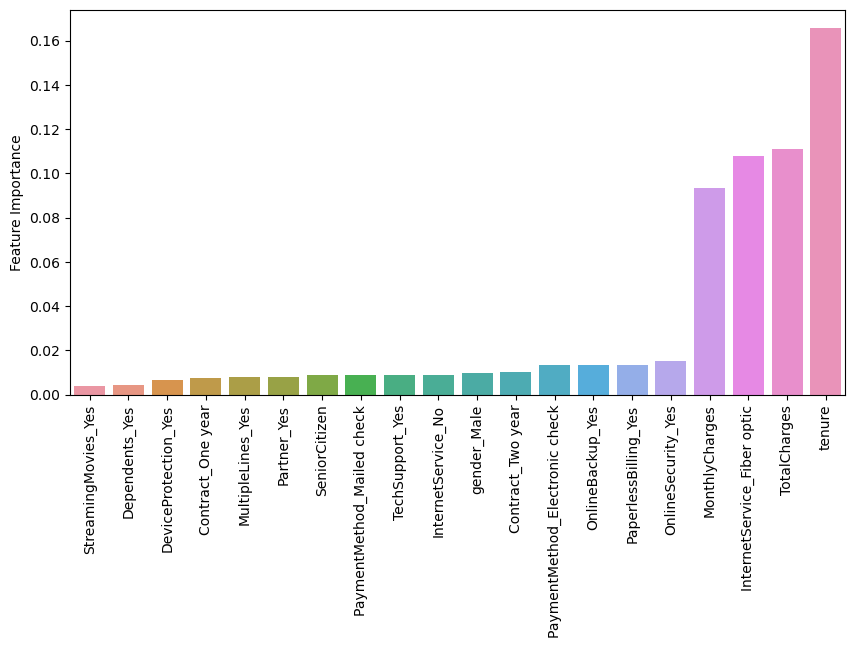

In [31]:
plt.figure(figsize=(10,5), dpi=100)
sns.barplot(data=imp_feats, x=imp_feats.index, y='Feature Importance')
plt.xticks(rotation=90);

---

## Random Forest

In [32]:
# Train the model
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier()
model2.fit(X_train, y_train)

RandomForestClassifier()

In [33]:
# Make predictions on test set
preds2 = model2.predict(X_test)

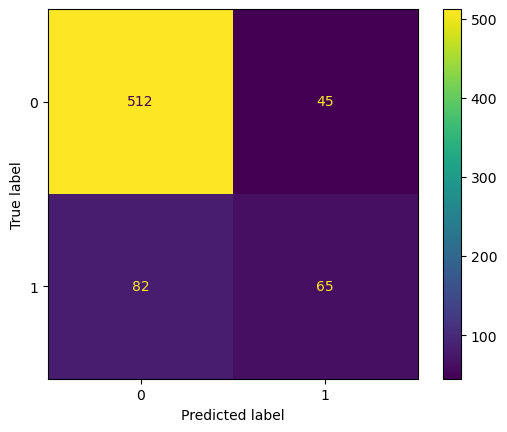

In [34]:
# Evaluate the model
cm = confusion_matrix(y_test, preds2)
disp = ConfusionMatrixDisplay(cm)
disp.plot();

In [35]:
accuracy_score(y_test, preds2)

0.8196022727272727

In [36]:
print(classification_report(y_test, preds2))

              precision    recall  f1-score   support

          No       0.86      0.92      0.89       557
         Yes       0.59      0.44      0.51       147

    accuracy                           0.82       704
   macro avg       0.73      0.68      0.70       704
weighted avg       0.81      0.82      0.81       704



---

## Boosted Trees

In [37]:
# Train the model
from sklearn.ensemble import AdaBoostClassifier
model3 = AdaBoostClassifier()
model3.fit(X_train, y_train)

AdaBoostClassifier()

In [38]:
# Make predictions on test set
preds3 = model3.predict(X_test)

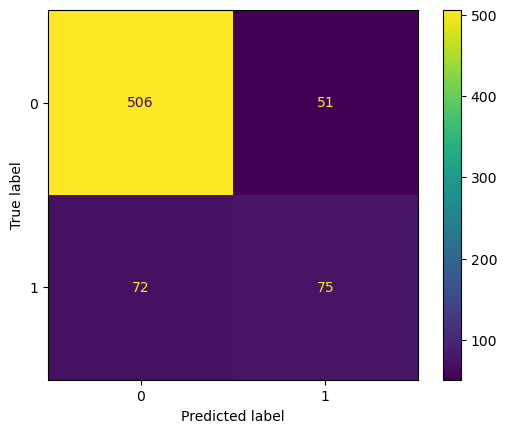

In [39]:
# Evaluate the model
cm = confusion_matrix(y_test, preds3)
disp = ConfusionMatrixDisplay(cm)
disp.plot();

In [40]:
accuracy_score(y_test, preds3)

0.8252840909090909

In [41]:
print(classification_report(y_test, preds3))

              precision    recall  f1-score   support

          No       0.88      0.91      0.89       557
         Yes       0.60      0.51      0.55       147

    accuracy                           0.83       704
   macro avg       0.74      0.71      0.72       704
weighted avg       0.82      0.83      0.82       704



---

**Random Forest performed the best in terms of accuracy (no grid search or cv was performed).**